In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [4]:
import time
import tensorflow as tf
from tensorflow import keras

# Task1
## Importing data

In [5]:
import os
import gzip
import numpy as np

current_dir = os.getcwd()
current_dir

'/home/pthapa2/snap/padam/Padam_PA2'

In [6]:
path = '/home/pthapa2/snap/padam/Padam_PA2/Fashion_MNIST_Data/'

## Second, import the Fashion MNIST data from the current directory+'\\Fashion_MNIST_Data' 
f = gzip.open(path+'/train-labels-idx1-ubyte.gz','rb')  #Load the training label  
y_train_full=np.frombuffer(f.read(), dtype=np.uint8,offset=8)
f.close()

f = gzip.open(path+'/train-images-idx3-ubyte.gz','rb')  #Load the training data
X_train_full=np.frombuffer(f.read(), dtype=np.uint8,offset=16)
f.close()
X_train_full=X_train_full.reshape(len(y_train_full), 28, 28)

f = gzip.open(path+'/t10k-labels-idx1-ubyte.gz','rb')   #Load the test label
y_test=np.frombuffer(f.read(), dtype=np.uint8,offset=8)
f.close()

f = gzip.open(path+'/t10k-images-idx3-ubyte.gz','rb')   #Load the test data
X_test=np.frombuffer(f.read(), dtype=np.uint8,offset=16).reshape(len(y_test), 28,28)  
f.close()

In [7]:
#Check the shape of the dataset
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


## Spliting full training dataset into validation dataset and training dataset. Scaling the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255 

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Task 2: Display a sample of images dataset from the training dataset in a 5 × 8 grid.

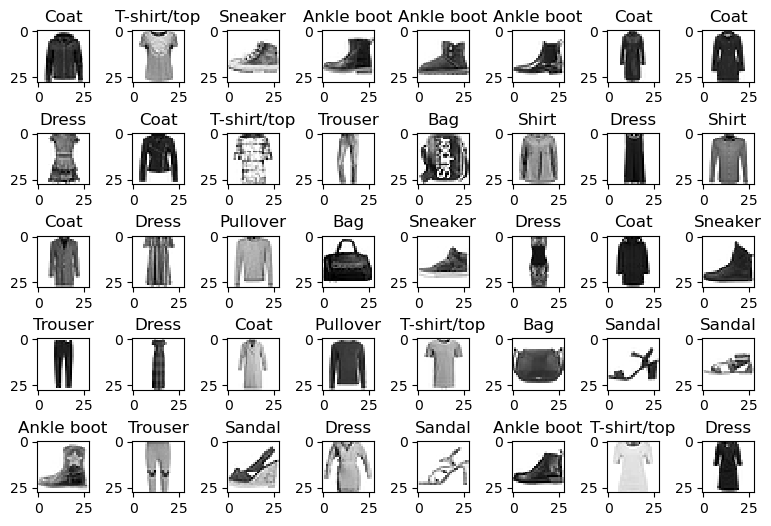

Figure 1: Samples from Fashion MNIST in a 5 x 8 grid


In [10]:
# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
n_rows = 5
n_cols = 8
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2)) # scale up, otherwsie, 28x28 image will look very small
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        #plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=1.0)

plt.show()
print("Figure 1: Samples from Fashion MNIST in a 5 x 8 grid")

# Task 3: Create the following 3 models, made of dense layers, using Functional API – load thismodel images and print 3 model-summaries (i.e., modeli.summary())

# Model 1

In [11]:
from IPython.display import display, HTML
image_path = '/home/pthapa2/snap/padam/Padam_PA2/images/model1.PNG'
model1 = f'<img src="{image_path}" width="300" style="border:1px solid black"/>'
display(HTML(model1))
print("Figure 2: Model 1")

Figure 2: Model 1


## Creating the Model 1

In [12]:
input_A = keras.layers.Input(shape=400)
input_B = keras.layers.Input(shape=400)
hidden1 = keras.layers.Dense(300, activation="relu")(input_B)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(10, activation="softmax")(concat)
model1 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

2023-11-08 09:57:33.782338: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78923 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:08:00.0, compute capability: 8.0


In [13]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 400)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 300)          120300      ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 400)]        0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 100)          30100       ['dense[0][0]']                  
                                                                                              

## Compiling model 1

In [14]:
model1.compile(loss="sparse_categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_model1.h5", save_best_only=True)

In [15]:
X_train_A=np.zeros((len(X_train),400))
X_train_B=np.zeros((len(X_train),400))
for i in range(len(X_train)):
    a=X_train[i].flatten()
    X_train_A[i,0:400]= a[0:400]
    X_train_B[i,0:400]= a[384:]
    
X_valid_A=np.zeros((len(X_valid),400))
X_valid_B=np.zeros((len(X_valid),400))
for i in range(len(X_valid)):
    b=X_valid[i].flatten()
    X_valid_A[i,0:400]= b[0:400]
    X_valid_B[i,0:400]= b[384:]

## Training Model 1

In [16]:
%time history1 = model1.fit((X_train_A, X_train_B), y_train, epochs=2000, validation_data=((X_valid_A, X_valid_B), y_valid), callbacks=[checkpoint_cb], workers=3)

Epoch 1/2000


2023-11-08 09:57:36.201802: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-08 09:57:36.204301: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f113a85e2b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-08 09:57:36.204317: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA A100 80GB PCIe, Compute Capability 8.0
2023-11-08 09:57:37.482722: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8901
2023-11-08 09:57:37.537634: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 [==============================] - 6s 2ms/step - loss: 0.8558 - accuracy: 0.7272 - val_loss: 0.6095 - val_accuracy: 0.8036
Epoch 2/2000
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5634 - accuracy: 0.8119 - val_loss: 0.5176 - val_accuracy: 0.8278
Epoch 3/2000
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5058 - accuracy: 0.8270 - val_loss: 0.4765 - val_accuracy: 0.8434
Epoch 4/2000
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4749 - accuracy: 0.8357 - val_loss: 0.4555 - val_accuracy: 0.8472
Epoch 5/2000
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4531 - accuracy: 0.8437 - val_loss: 0.4447 - val_accuracy: 0.8440
Epoch 6/2000
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4362 - accuracy: 0.8501 - val_loss: 0.4291 - val_accuracy: 0.8534
Epoch 7/2000
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4246 - accuracy: 0.8539 - val_loss: 0.4157 - val_accuracy

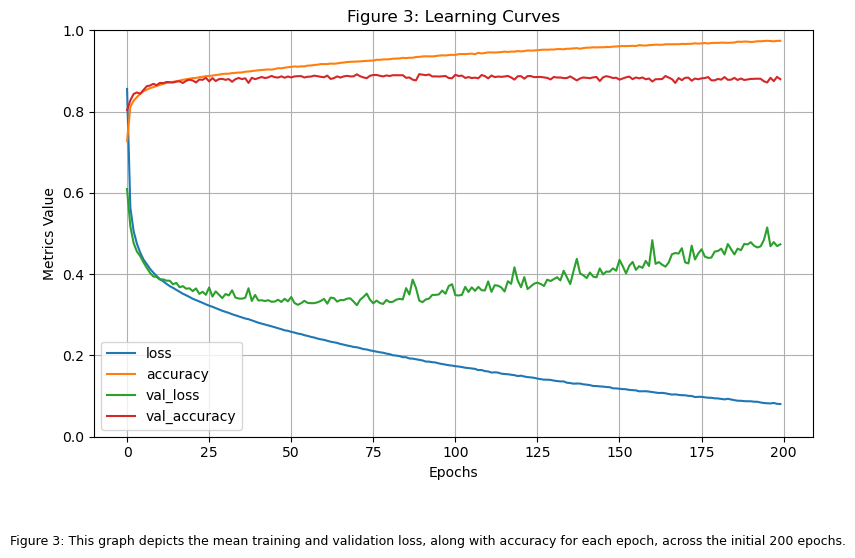

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Extracting the training history for the first 200 epochs
pd.DataFrame(history1.history).iloc[0:200,:].plot(figsize=(8, 5))

plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.title('Figure 3: Learning Curves')  # Title with figure number
# Concise caption detailing what the learning curves represent
caption = ("Figure 3: This graph depicts the mean training and validation loss, "
           "along with accuracy for each epoch, across the initial 200 epochs.")
plt.figtext(0.5, -0.1, caption, ha="center", fontsize=9, wrap=True)

plt.xlabel('Epochs')
plt.ylabel('Metrics Value')
plt.tight_layout()
plt.show()

## Testing Model 1

In [18]:
modelA = keras.models.load_model("Best_model1.h5") # rollback to best model

X_test_A=np.zeros((len(X_test),400))
X_test_B=np.zeros((len(X_test),400))
for i in range(len(X_test)):
    c=X_test[i].flatten()
    X_test_A[i,0:400]= c[0:400]
    X_test_B[i,0:400]= c[384:]


modelA.evaluate((X_test_A, X_test_B), y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3531 - accuracy: 0.8802


[0.353091835975647, 0.8802000284194946]

# Model 2

In [19]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
from IPython.display import display, HTML
image_path = '/home/pthapa2/snap/padam/Padam_PA2/images/model2.PNG'
model1 = f'<img src="{image_path}" width="300" style="border:1px solid black"/>'
display(HTML(model1))
print("Figure 4: Model 2")

Figure 4: Model 2


## Creating Model 2

In [21]:
input_A = keras.layers.Input(shape=400)
input_B = keras.layers.Input(shape=400)
hidden1_ = keras.layers.Dense(300, activation="relu")(input_A)
hidden1 = keras.layers.Dense(300, activation="relu")(input_B)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
concat = keras.layers.concatenate([hidden1_, hidden2])
output = keras.layers.Dense(10, activation="softmax")(concat)
model2 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [22]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 400)]        0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 400)]        0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 300)          120300      ['input_2[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 300)          120300      ['input_1[0][0]']                
                                                                                              

## Compiling the Model 2

In [23]:
model2.compile(loss="sparse_categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_model2.h5", save_best_only=True)

In [24]:
X_train_A=np.zeros((len(X_train),400))
X_train_B=np.zeros((len(X_train),400))
for i in range(len(X_train)):
    a=X_train[i].flatten()
    X_train_A[i,0:400]= a[0:400]
    X_train_B[i,0:400]= a[384:]
    
X_valid_A=np.zeros((len(X_valid),400))
X_valid_B=np.zeros((len(X_valid),400))
for i in range(len(X_valid)):
    b=X_valid[i].flatten()
    X_valid_A[i,0:400]= b[0:400]
    X_valid_B[i,0:400]= b[384:]

## Training Model 2

In [25]:
%time history2 = model2.fit((X_train_A, X_train_B), y_train, epochs=2000, validation_data=((X_valid_A, X_valid_B), y_valid),callbacks=[checkpoint_cb])

Epoch 1/2000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8184 - accuracy: 0.7408 - val_loss: 0.5581 - val_accuracy: 0.8196
Epoch 2/2000
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5262 - accuracy: 0.8217 - val_loss: 0.4725 - val_accuracy: 0.8434
Epoch 3/2000
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4733 - accuracy: 0.8364 - val_loss: 0.4913 - val_accuracy: 0.8216
Epoch 4/2000
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4454 - accuracy: 0.8462 - val_loss: 0.4257 - val_accuracy: 0.8568
Epoch 5/2000
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4275 - accuracy: 0.8526 - val_loss: 0.4033 - val_accuracy: 0.8642
Epoch 6/2000
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4109 - accuracy: 0.8581 - val_loss: 0.3962 - val_accuracy: 0.8700
Epoch 7/2000
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3997 - accuracy: 0.8632 - val_loss: 0.3893 -

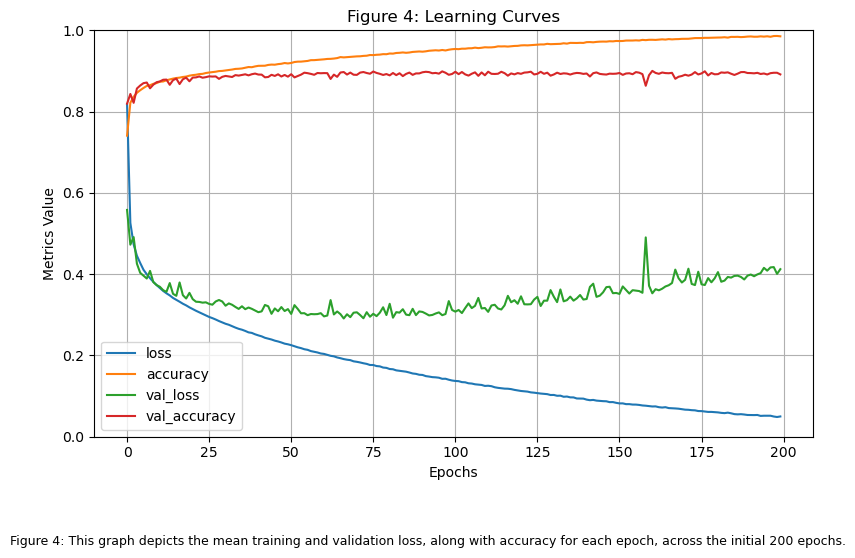

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Extracting the training history for the first 200 epochs
pd.DataFrame(history2.history).iloc[0:200,:].plot(figsize=(8, 5))

plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.title('Figure 4: Learning Curves')  # Title with figure number
# Concise caption detailing what the learning curves represent
caption = ("Figure 4: This graph depicts the mean training and validation loss, "
           "along with accuracy for each epoch, across the initial 200 epochs.")
plt.figtext(0.5, -0.1, caption, ha="center", fontsize=9, wrap=True)

plt.xlabel('Epochs')
plt.ylabel('Metrics Value')
plt.tight_layout()
plt.show()

## Testing Model 2

In [27]:
modelB = keras.models.load_model("Best_model2.h5") # rollback to best model

X_test_A=np.zeros((len(X_test),400))
X_test_B=np.zeros((len(X_test),400))
for i in range(len(X_test)):
    c=X_test[i].flatten()
    X_test_A[i,0:400]= c[0:400]
    X_test_B[i,0:400]= c[384:]


modelB.evaluate((X_test_A, X_test_B), y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3222 - accuracy: 0.8856


[0.3221619427204132, 0.8855999708175659]

# Model 3

In [28]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [29]:
from IPython.display import display, HTML
image_path = '/home/pthapa2/snap/padam/Padam_PA2/images/model3.PNG'
model1 = f'<img src="{image_path}" width="300" style="border:1px solid black"/>'
display(HTML(model1))
print("Figure 5: Model 3")

Figure 5: Model 3


## Creating Model 3

In [30]:
input_A = keras.layers.Input(shape=300)
input_B = keras.layers.Input(shape=300)
input_C = keras.layers.Input(shape=300)
hidden1_ = keras.layers.Dense(300, activation="relu")(input_A)
hidden1 = keras.layers.Dense(300, activation="relu")(input_B)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
hiddenC1 = keras.layers.Dense(300, activation="relu")(input_C)
hiddenC2 = keras.layers.Dense(100, activation="relu")(hiddenC1)
hiddenC3 = keras.layers.Dense(100, activation="relu")(hiddenC2)
concat = keras.layers.concatenate([hidden1_, hidden2, hiddenC3])
output = keras.layers.Dense(10, activation="softmax")(concat)
model3 = keras.models.Model(inputs=[input_A, input_B, input_C], outputs=[output])

In [31]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 300)          90300       ['input_3[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                              

## Compiling Model 3

In [32]:
model3.compile(loss="sparse_categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_model3.h5", save_best_only=True)

In [33]:
X_train_A=np.zeros((len(X_train),300))
X_train_B=np.zeros((len(X_train),300))
X_train_C=np.zeros((len(X_train),300))
for i in range(len(X_train)):
    a=X_train[i].flatten()
    X_train_A[i,0:300]= a[0:300]
    X_train_B[i,0:300]= a[243:543]
    X_train_C[i,0:300]= a[484:]
    
X_valid_A=np.zeros((len(X_valid),300))
X_valid_B=np.zeros((len(X_valid),300))
X_valid_C=np.zeros((len(X_valid),300))
for i in range(len(X_valid)):
    b=X_valid[i].flatten()
    X_valid_A[i,0:300]= b[0:300]
    X_valid_B[i,0:300]= b[243:543]
    X_valid_C[i,0:300]= b[484:]

## Training Model 3

In [34]:
%time history3 = model3.fit((X_train_A, X_train_B, X_train_C), y_train, epochs=2000, validation_data=((X_valid_A, X_valid_B, X_valid_C), y_valid),callbacks=[checkpoint_cb])

Epoch 1/2000
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8223 - accuracy: 0.7424 - val_loss: 0.5655 - val_accuracy: 0.8108
Epoch 2/2000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5285 - accuracy: 0.8172 - val_loss: 0.4780 - val_accuracy: 0.8400
Epoch 3/2000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4768 - accuracy: 0.8332 - val_loss: 0.4911 - val_accuracy: 0.8208
Epoch 4/2000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4474 - accuracy: 0.8438 - val_loss: 0.4270 - val_accuracy: 0.8554
Epoch 5/2000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4274 - accuracy: 0.8519 - val_loss: 0.4065 - val_accuracy: 0.8628
Epoch 6/2000
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4093 - accuracy: 0.8573 - val_loss: 0.3951 - val_accuracy: 0.8696
Epoch 7/2000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3968 - accuracy: 0.8623 - val_loss: 0.3876 -

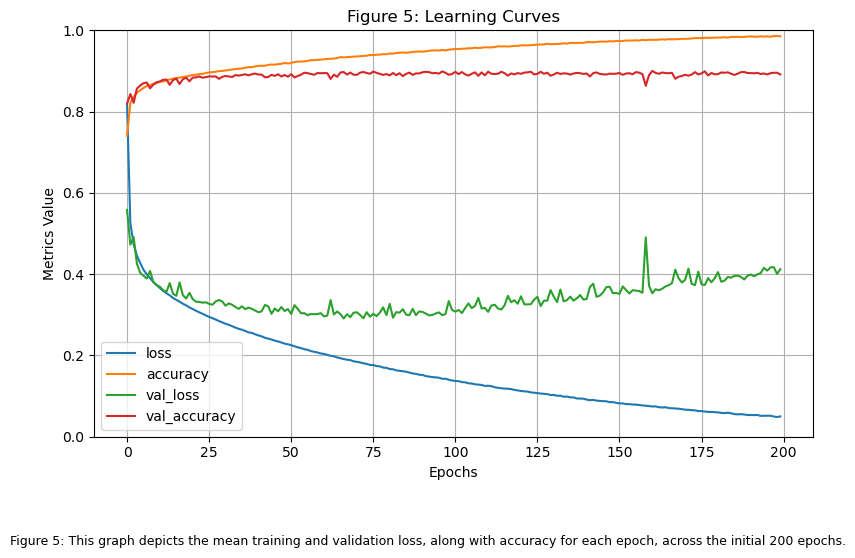

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Extracting the training history for the first 200 epochs
pd.DataFrame(history2.history).iloc[0:200,:].plot(figsize=(8, 5))

plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.title('Figure 5: Learning Curves')  # Title with figure number
# Concise caption detailing what the learning curves represent
caption = ("Figure 5: This graph depicts the mean training and validation loss, "
           "along with accuracy for each epoch, across the initial 200 epochs.")
plt.figtext(0.5, -0.1, caption, ha="center", fontsize=9, wrap=True)

plt.xlabel('Epochs')
plt.ylabel('Metrics Value')
plt.tight_layout()
plt.show()

## Testing Model 3

In [36]:
modelC = keras.models.load_model("Best_model3.h5") # rollback to best model

X_test_A=np.zeros((len(X_test),300))
X_test_B=np.zeros((len(X_test),300))
X_test_C=np.zeros((len(X_test),300))
for i in range(len(X_test)):
    c=X_test[i].flatten()
    X_test_A[i,0:300]= c[0:300]
    X_test_B[i,0:300]= c[243:543]
    X_test_C[i,0:300]= c[484:]


modelC.evaluate((X_test_A, X_test_B, X_test_C), y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3247 - accuracy: 0.8878


[0.32474732398986816, 0.8877999782562256]